# TP1

In [25]:
import numpy as np
import random as r
import numpy.random as nr
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
def function(n, theta_a, theta_b, power, cte):
    a = []
    b = []
    c = [
        10 * i ** power if (i % 2 == 0) else (10 * (i - 1) ** power + cte)
        for i in range(n)
    ]
    a.append(1 if r.random() < theta_a else 0)
    b.append(1 if r.random() < theta_b else 0)
    x = [a[0], b[0]]
    N_A = [1,1]
    N_B = [0,1]
    for i in range(n - 2):
        if i in c:
            if c.index(i) % 2 == 0:
                a.append(1 if r.random() < theta_a else 0)
                x.append(a[-1])
            else:
                b.append(1 if r.random() < theta_b else 0)
                x.append(b[-1])
        elif np.mean(a) >= np.mean(b):
            a.append(1 if r.random() < theta_a else 0)
            x.append(a[-1])
        else:
            b.append(1 if r.random() < theta_b else 0)
            x.append(b[-1])
        N_A.append(len(a))
        N_B.append(len(b))

    return (x, N_A, N_B)

C:\Users\eceya\AppData\Local\Temp\ipykernel_18292\3046320505.py:12: RuntimeWarning: divide by zero encountered in divide
  ax[i,j].plot(np.array(range(n)), np.cumsum(X)/idx, label='X/n')
C:\Users\eceya\AppData\Local\Temp\ipykernel_18292\3046320505.py:14: RuntimeWarning: divide by zero encountered in divide
  ax[i,j].plot(np.array(range(n)), N_A/idx, label='N_A')
C:\Users\eceya\AppData\Local\Temp\ipykernel_18292\3046320505.py:15: RuntimeWarning: invalid value encountered in divide
  ax[i,j].plot(np.array(range(n)), N_B/idx, label='N_B')
C:\Users\eceya\AppData\Local\Temp\ipykernel_18292\3046320505.py:12: RuntimeWarning: divide by zero encountered in divide
  ax[i,j].plot(np.array(range(n)), np.cumsum(X)/idx, label='X/n')
C:\Users\eceya\AppData\Local\Temp\ipykernel_18292\3046320505.py:14: RuntimeWarning: divide by zero encountered in divide
  ax[i,j].plot(np.array(range(n)), N_A/idx, label='N_A')
C:\Users\eceya\AppData\Local\Temp\ipykernel_18292\3046320505.py:15: RuntimeWarning: invalid v

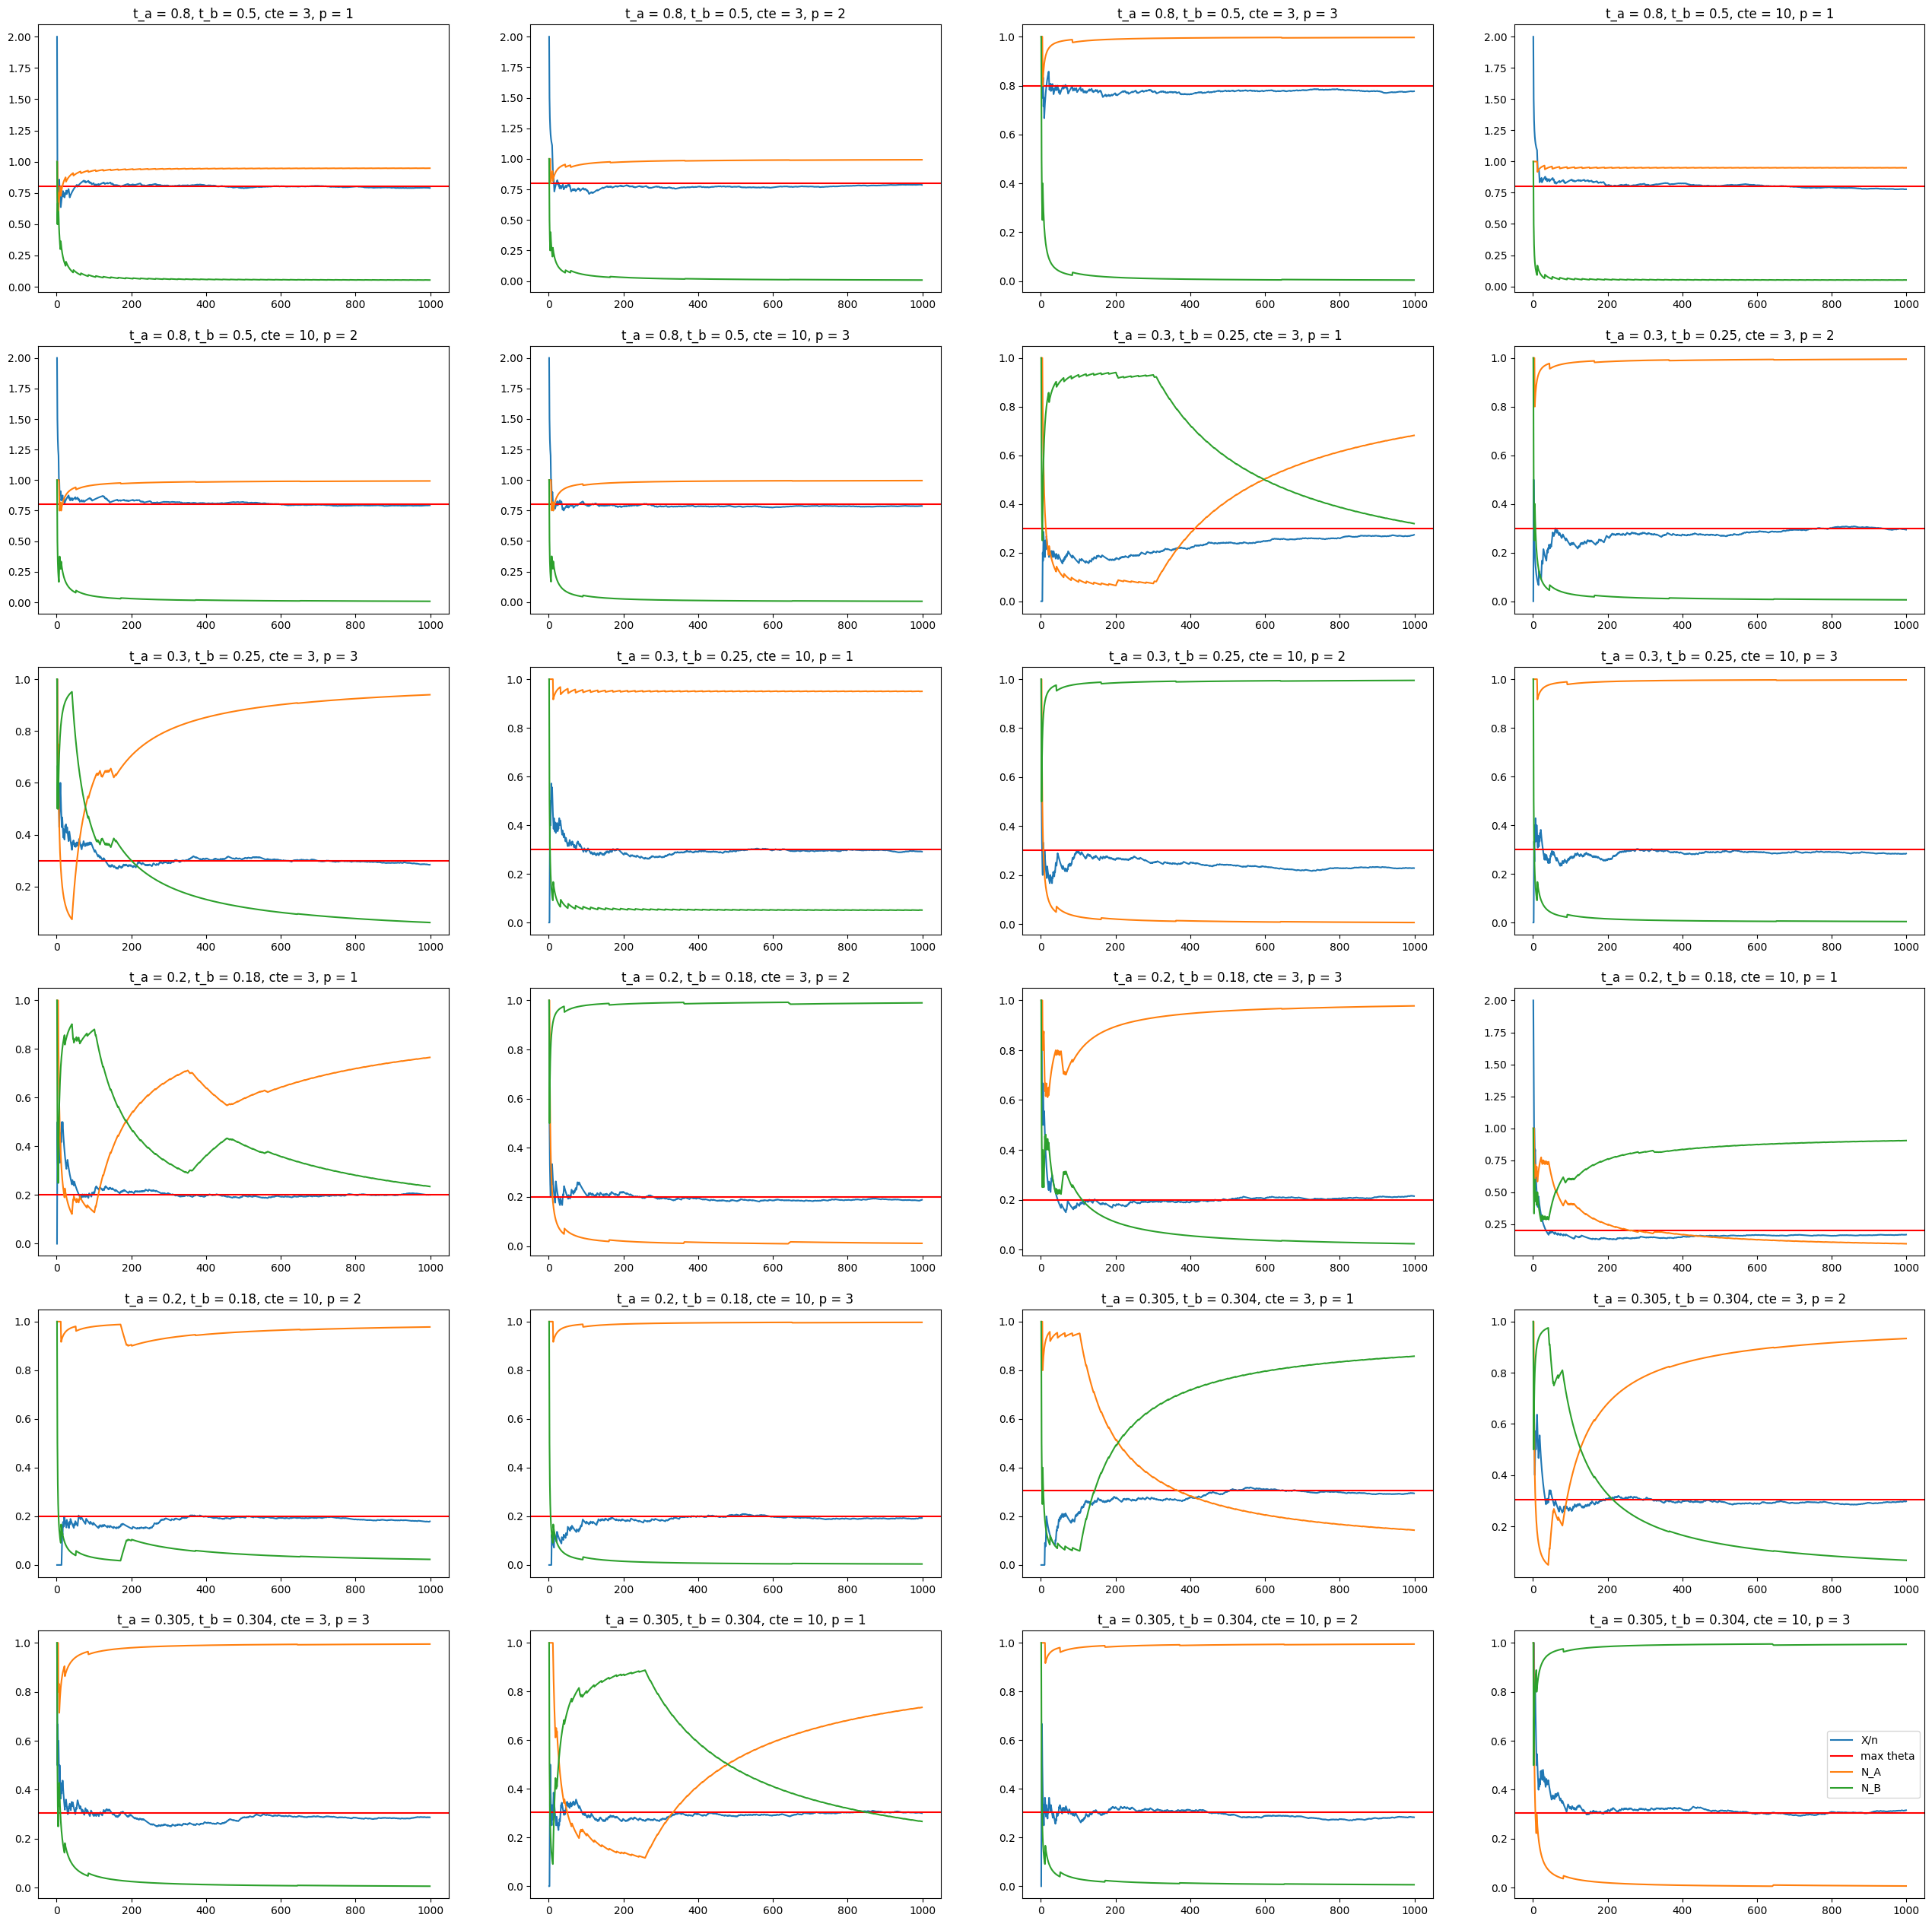

In [23]:
n = 1000
theta = [(0.8,0.5), (0.3,0.25), (0.2, 0.18), (0.305,0.304)]
cte = [3, 10]
power = [1,2,3]
idx = np.array(range(n))
fig, ax = plt.subplots(6,4, figsize=(32,32))
i, j = 0, 0
for (a,b) in theta:
    for c in cte:
        for p in power:
            X, N_A, N_B = function(n, a, b, p, c)
            ax[i,j].plot(np.array(range(n)), np.cumsum(X)/idx, label='X/n')
            ax[i,j].axhline(y=max(a, b), color='r', linestyle='-', label='max theta')
            ax[i,j].plot(np.array(range(n)), N_A/idx, label='N_A')
            ax[i,j].plot(np.array(range(n)), N_B/idx, label='N_B')
            ax[i,j].set_title(f"t_a = {a}, t_b = {b}, cte = {c}, p = {p}")
            
            j += 1
            if j == 4:
                j = 0
                i += 1
                
plt.legend()
plt.show()

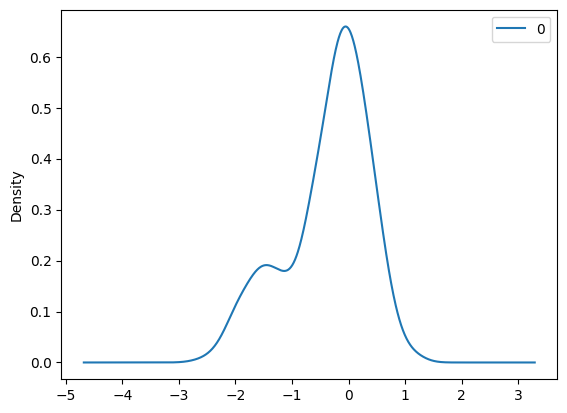

In [35]:
n = 1000
idx = np.array(range(n))
theta = (0.3, 0.25)
p = 2
cte = 3
G = []
for _ in range(100):
    X, N_A, N_B = function(n, theta[0], theta[1], p, cte)
    G.append(np.sqrt(n) * (np.mean(X) - max(theta)))
df = pd.DataFrame(G)
df.plot.kde()
plt.show()
# plt.plot(np.sqrt(idx)*(np.cumsum(X)/idx - max(theta)))

In [36]:
def function_hectic(n, theta_a, theta_b, power, cte):
    a = []
    b = []
    c = [
        1 * i ** power if (i % 2 == 0) else (10 * (i - 1) ** power + cte)
        for i in range(n)
    ]
    a.append(1 if r.random() < theta_a else 0)
    b.append(1 if r.random() < theta_b else 0)
    x = [a[0], b[0]]
    N_A = [1, 1]
    N_B = [0, 1]
    for i in range(n - 2):
        if i in c:
            if c.index(i) % 2 == 0:
                a.append(1 if r.random() < theta_a else 0)
                x.append(a[-1])
            else:
                b.append(1 if r.random() < theta_b else 0)
                x.append(b[-1])
        elif np.mean(a) >= np.mean(b):
            a.append(1 if r.random() < theta_a else 0)
            x.append(a[-1])
        else:
            b.append(1 if r.random() < theta_b else 0)
            x.append(b[-1])
        N_A.append(len(a))
        N_B.append(len(b))

    return (x, N_A, N_B)

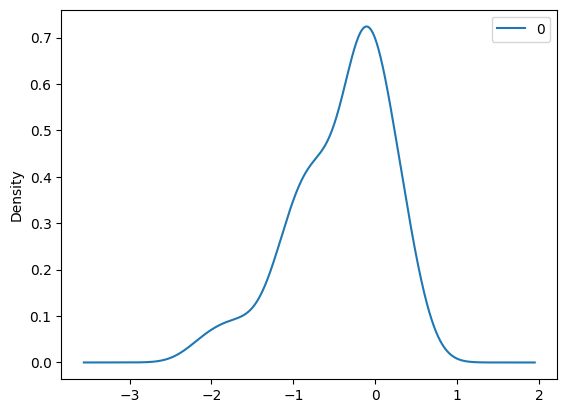

In [38]:
n = 1000
# idx = np.array(range(n))
theta = (0.3, 0.25)
p = 1
cte = 1
G = []
for _ in range(100):
    X, N_A, N_B = function(n, theta[0], theta[1], p, cte)
    G.append(np.sqrt(n) * (np.mean(X) - max(theta)))
df = pd.DataFrame(G)
df.plot.kde()
plt.show()
# plt.plot(np.sqrt(idx)*(np.cumsum(X)/idx - max(theta)))